In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE #Feature ranking with recursive feature elimination.
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


import plotly.express as px

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
PROJECT_ROOT_DIR = "/Users/daniel421/Desktop/STAT_724/ds_724/Final_Project"
CHAPTER_ID = "Lin_regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#### Column indices to potentially drop: 4,5,6 and -1

In [3]:
import os
#UP_DIR = '/Users/daniel421/Desktop/STAT_724/ISLR_data'
csv_file = os.path.join(PROJECT_ROOT_DIR,'listings_6.csv')
abnb = pd.read_csv(csv_file, low_memory=False)
abnb = pd.DataFrame(data = abnb)
abnb_viz = abnb
#abnb = abnb.drop(abnb.columns[[4,5,6,-1]], axis = 1)

## More visualizations

In [4]:
print(abnb_viz.columns)

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_r

In [5]:
abnb_viz_queens_df = abnb_viz[abnb_viz.Borough == 'Queens']
abnb_viz_brooklyn_df = abnb_viz[abnb_viz.Borough == 'Brooklyn']

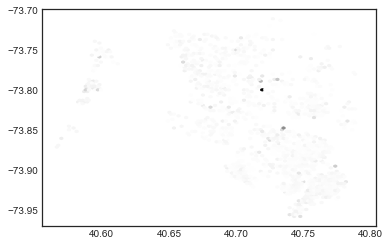

In [6]:
x1 = abnb_viz_queens_df['latitude']
y1 = abnb_viz_queens_df['longitude']
plt.hexbin(x1, y1, alpha=10, C = abnb_viz_queens_df.price)

In [7]:
# %store -r abnb_queens_df
# print(abnb_queens_df.head())

No handles with labels found to put in legend.


Saving figure queens_prices_scatterplot


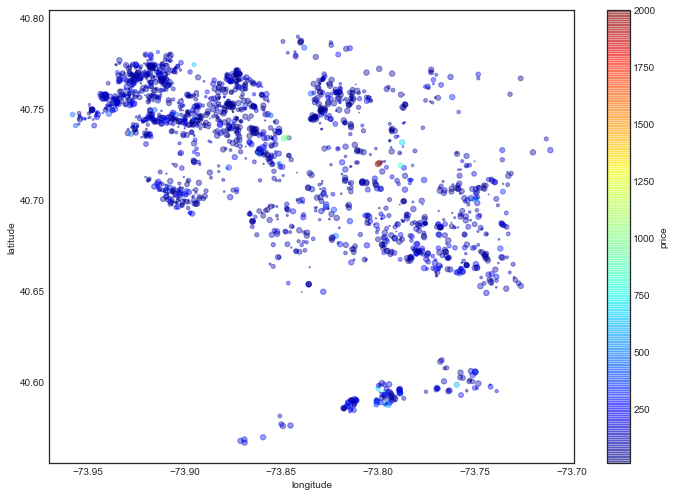

In [8]:
# abnb_queens_df.plot?
abnb_viz_queens_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s = 'availability_30',
             figsize=(10,7),
             c="price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("queens_prices_scatterplot")

No handles with labels found to put in legend.


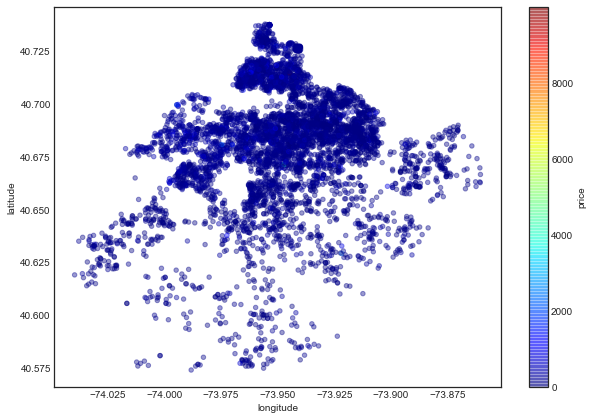

In [9]:
abnb_viz_brooklyn_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             figsize=(10,7),
             c="price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [10]:
# filename = "brooklyn.png"
# import matplotlib.image as mpimg
# bk_img=mpimg.imread(os.path.join(IMAGES_PATH, filename))
# ax = abnb_viz_brooklyn_df.plot(kind="scatter", x="longitude", y="latitude", figsize=(12,8), s = 'availability_30',
#                   c ="price", cmap=plt.get_cmap("jet"), sharex = False, 
#                   colorbar=False, alpha=0.4)
# plt.imshow(bk_img, extent=[-76, -73, 40, 41], alpha=0.5,
#            cmap=plt.get_cmap("jet"))
# plt.ylabel("Latitude", fontsize=14)
# plt.xlabel("Longitude", fontsize=14)

# # tick_values = np.linspace(abnb_viz.price.min(), abnb_viz.price.max(), 11)
# # cbar = plt.colorbar(ticks=tick_values/abnb_viz.price.max())
# # cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
# # cbar.set_label('Price', fontsize=16)

# plt.legend(fontsize=16)
# #save_fig("NYC_housing_prices_plot")
# plt.show()

No handles with labels found to put in legend.


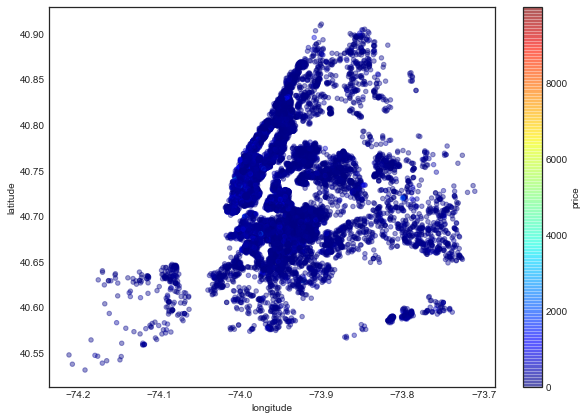

In [11]:
abnb_viz.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
            c= "price", cmap=plt.get_cmap("jet"), colorbar = True,
            sharex=False)
plt.legend()

In [12]:
filename = "Neighbourhoods_New_York_City_Map2.png"

No handles with labels found to put in legend.


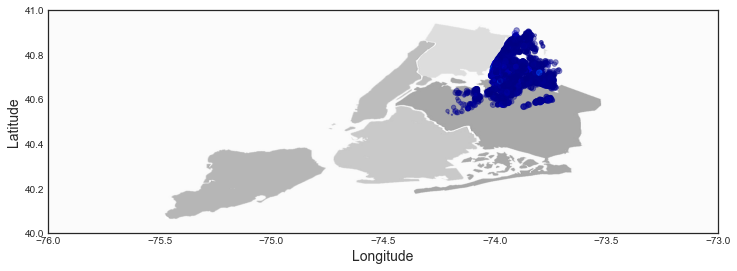

In [13]:
import matplotlib.image as mpimg
NYC_img=mpimg.imread(os.path.join(IMAGES_PATH, filename))
ax = abnb_viz.plot(kind="scatter", x="longitude", y="latitude", figsize=(12,8), s = 'availability_30',
                  c ="price", cmap=plt.get_cmap("jet"), sharex = False, 
                  colorbar=False, alpha=0.4)
plt.imshow(NYC_img, extent=[-76, -73, 40, 41], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# tick_values = np.linspace(abnb_viz.price.min(), abnb_viz.price.max(), 11)
# cbar = plt.colorbar(ticks=tick_values/abnb_viz.price.max())
# cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
# cbar.set_label('Price', fontsize=16)

plt.legend(fontsize=16)
#save_fig("NYC_housing_prices_plot")
plt.show()

## Fill NA with Sklearn SimpleImputer

In [14]:
abnb.fillna(abnb.mean(), inplace=True)

In [15]:
# s_imputer = SimpleImputer(missing_values= np.nan, strategy = 'mean', verbose=0)
# s_imputer = s_imputer.fit(abnb[1:,1:])
# abnb = s_imputer.transform(abnb)

In [16]:
abnb = pd.DataFrame(data = abnb)
print(abnb.columns)

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_r

In [17]:
# abnb.dtypes

In [18]:
# abnb['host_response_rate'] = abnb['host_response_rate'].astype(float, errors = 'raise')
# abnb['host_response_rate'] = pd.to_numeric(abnb['host_response_rate'], errors='coerce')
# abnb['host_response_rate'] = (abnb['host_response_rate'].str.strip('%').astype(float))
# abnb['host_response_rate'] = abnb['host_response_rate']/100
# abnb['host_acceptance_rate'] = (abnb['host_acceptance_rate'].str.strip('%').astype(float))
# abnb['host_acceptance_rate'] = abnb['host_acceptance_rate']/100


## Need to scale the dataframe?

#### Column indices to potentially drop: 4,5,6 and -1

In [19]:
abnb_df = abnb.drop(abnb.columns[[4,5,6,-1]], axis = 1)

In [20]:
# rescaling the variables (both)
scaler = MinMaxScaler()
abnb_df_scaled = scaler.fit_transform(abnb_df)
# rename columns (since now its an np array)
abnb_df_scaled = pd.DataFrame(abnb_df_scaled)
abnb_df_scaled.columns = abnb_df.columns
print(abnb_df_scaled.iloc[:5,:5])

   host_response_rate  host_acceptance_rate  host_listings_count  \
0                0.35                  0.18             0.002549   
1                0.21                  0.76             0.000319   
2                1.00                  1.00             0.000319   
3                1.00                  0.25             0.000319   
4                1.00                  1.00             0.000319   

   host_total_listings_count  accommodates  
0                   0.002549        0.0625  
1                   0.000319        0.1875  
2                   0.000319        0.1250  
3                   0.000319        0.2500  
4                   0.000319        0.1250  


## Split into train and test and store variables

creating y_train and y_test, X_train, X_test

In [21]:
abnb_X = abnb_df_scaled.drop(['price'], axis = 1)
abnb_y = abnb_df_scaled['price']

In [22]:
print(abnb_X.shape)
print(abnb_y.shape)

(15991, 41)
(15991,)


In [23]:
# abnb_train, abnb_test = train_test_split(abnb_df_scaled, train_size = 0.7, test_size = 0.3, random_state = 10)

# y_train = abnb_train['price']
# y_test = abnb_test['price']

## y_train = abnb_train.loc[:,'price']
## y_test = abnb_test.loc[:,'price']

# X_train = abnb_train.drop('price', axis = 1)
# X_test = abnb_test.drop('price', axis = 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(abnb_X, abnb_y, test_size=0.3, random_state=10)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11193, 41)
(4798, 41)
(11193,)
(4798,)


In [26]:
print(isinstance(y_train, pd.DataFrame))
print(isinstance(y_train, pd.Series))

False
True


In [27]:
print(pd.DataFrame(y_train))
print(pd.DataFrame(y_test))
# y_train_2 = pd.DataFrame(y_train)
# print(y_train_2)

          price
4047   0.007801
15177  0.009501
3116   0.011501
3338   0.021002
11095  0.011701
...         ...
11633  0.008401
1344   0.070007
12815  0.075008
7293   0.022002
1289   0.004500

[11193 rows x 1 columns]
          price
13788  0.012801
4302   0.012501
8410   0.005201
14404  0.005701
4854   0.013501
...         ...
3554   0.028003
3490   0.030003
13016  0.027303
7787   0.010901
9775   0.012901

[4798 rows x 1 columns]


In [28]:
print(pd.DataFrame(y_train))
print(pd.DataFrame(y_test))

          price
4047   0.007801
15177  0.009501
3116   0.011501
3338   0.021002
11095  0.011701
...         ...
11633  0.008401
1344   0.070007
12815  0.075008
7293   0.022002
1289   0.004500

[11193 rows x 1 columns]
          price
13788  0.012801
4302   0.012501
8410   0.005201
14404  0.005701
4854   0.013501
...         ...
3554   0.028003
3490   0.030003
13016  0.027303
7787   0.010901
9775   0.012901

[4798 rows x 1 columns]


In [29]:
%store y_train

Stored 'y_train' (Series)


In [30]:
%store y_train
%store y_test
%store X_train
%store X_test
%store abnb_X
%store abnb_y

Stored 'y_train' (Series)
Stored 'y_test' (Series)
Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'abnb_X' (DataFrame)
Stored 'abnb_y' (Series)


In [31]:
# print(len(X_test))
# print(len(y_test))

In [32]:
print(len(X_train))
print(len(y_train))
print(X_train.shape)
print(y_train.shape)

11193
11193
(11193, 41)
(11193,)


In [33]:
print(isinstance(y_train, pd.DataFrame))
print(isinstance(y_train, pd.Series))

False
True


In [34]:
abnb_y.values

array([0.0150015 , 0.00730073, 0.0060006 , ..., 0.0060006 , 0.0070007 ,
       0.00620062])

In [132]:
# print(y_train.iloc[:,:])

# Linear Regression

## Building a model without cross-validation

In [133]:
print(len(X_train.columns))
print(X_train.shape, y_train.shape)
print(X_train.shape)

41
(11193, 41) (11193,)
(11193, 41)


In [134]:
# first model with an arbitrary choice of n_features
# running RFE with number of features = 20

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [135]:
print(rfe)

RFE(estimator=LinearRegression(), n_features_to_select=20)


In [136]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('host_response_rate', False, 12),
 ('host_acceptance_rate', False, 20),
 ('host_listings_count', True, 1),
 ('host_total_listings_count', True, 1),
 ('accommodates', True, 1),
 ('bedrooms', True, 1),
 ('beds', True, 1),
 ('minimum_nights', True, 1),
 ('maximum_nights', False, 14),
 ('minimum_minimum_nights', False, 10),
 ('maximum_minimum_nights', True, 1),
 ('minimum_maximum_nights', True, 1),
 ('maximum_maximum_nights', True, 1),
 ('minimum_nights_avg_ntm', True, 1),
 ('maximum_nights_avg_ntm', True, 1),
 ('availability_30', False, 6),
 ('availability_60', False, 19),
 ('availability_90', False, 18),
 ('availability_365', False, 13),
 ('number_of_reviews', True, 1),
 ('number_of_reviews_ltm', True, 1),
 ('number_of_reviews_l30d', True, 1),
 ('review_scores_rating', False, 5),
 ('review_scores_accuracy', False, 17),
 ('review_scores_cleanliness', False, 3),
 ('review_scores_checkin', False, 4),
 ('review_scores_communication', False, 16),
 ('review_scores_location', True, 1),
 ('rev

predict price of X_test

In [137]:
from sklearn.metrics import r2_score

The r2_score fucntion computes the coefficient of determination, usually denoted as R². It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

In [138]:
# predict prices of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = r2_score(y_test, y_pred)
print(r2)

0.28228895316734615


This low value tells us that there is little correlation 

Perhaps we increase the numbers of features to select

In [139]:
# try with another value of RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=25)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.2919812747325097


We see that there is not much of an icrease

## Begin by implementing K-fold cross validation

In [140]:
#k-fold CV (using all the numerical variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
print(scores)

[0.07979227 0.25628204 0.2780594  0.28280741 0.27340943 0.34995477
 0.32158162 0.24537464 0.35150109 0.16234735]


Another way of implementing the code above:

In [141]:
# create a KFold object with 10 splits, the random state parameter is used 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
print(scores)  

[0.25874207 0.30562517 0.06538084 0.2582094  0.27258172 0.30408126
 0.32383632 0.33217462 0.20217354 0.21158081]


Let's get the mean squared error values

In [142]:
scores = cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
print(scores)

[-0.00112609 -0.0003559  -0.00023785 -0.00020066 -0.00015633 -0.00021891
 -0.00014979 -0.00034969 -0.00021351 -0.00050451]


## Grid Search CV

In [143]:
len(X_train.columns)

41

The following code will take approximately 40 seconds to run

In [144]:
# folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# # step-2: specify range of hyperparameters to tune
# hyper_params = [{'n_features_to_select': list(range(1, 42))}]


# # step-3: perform grid search
# # 3.1 specify model
# lm = LinearRegression()
# lm.fit(X_train, y_train)
# rfe = RFE(lm)             

# # 3.2 call GridSearchCV()
# model_cv = GridSearchCV(estimator = rfe, 
#                         param_grid = hyper_params, 
#                         scoring= 'r2', 
#                         cv = folds, 
#                         verbose = 1,
#                         return_train_score=True)      

# # fit the model
# model_cv.fit(X_train, y_train)                  

Lets put these into a dataframe, to plot these results

In [145]:
# # cv results
# cv_results = pd.DataFrame(model_cv.cv_results_)
# print(cv_results)

In [146]:
# # plotting cv results
# plt.figure(figsize=(16,6))

# plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
# plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
# plt.xlabel('number of features')
# plt.ylabel('r-squared')
# plt.title("Optimal Number of Features")
# plt.legend(['test score', 'train score'], loc='upper left')

We see that after 26, there is a stablization in the r-squared.

In [147]:
# final model
n_features_optimal = 26

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.298596279259179


In [148]:
# Refer to HW2 for more quick models

# Ridge Regression

In [149]:
# %load ../standard_import.txt`
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# conda install -c conda-forge glmnet
# import glmnet as gln

from sklearn.preprocessing import scale 
from sklearn import model_selection

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

#from sklearn.decomposition import PCA
#rom sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error

#import sklearn.linear_model as skl_lm
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import  LeaveOneOut, KFold, cross_val_score


%matplotlib inline
plt.style.use('seaborn-white')

In [150]:
# from sklearn import linear_model
# reg = linear_model.Ridge(alpha = 0.5)

In [151]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas = 10**np.linspace(2,-2,100)*0.5
# print(alphas)

[5.00000000e+01 4.55581378e+01 4.15108784e+01 3.78231664e+01
 3.44630605e+01 3.14014572e+01 2.86118383e+01 2.60700414e+01
 2.37540508e+01 2.16438064e+01 1.97210303e+01 1.79690683e+01
 1.63727458e+01 1.49182362e+01 1.35929412e+01 1.23853818e+01
 1.12850986e+01 1.02825615e+01 9.36908711e+00 8.53676324e+00
 7.77838072e+00 7.08737081e+00 6.45774833e+00 5.88405976e+00
 5.36133611e+00 4.88504979e+00 4.45107543e+00 4.05565415e+00
 3.69536102e+00 3.36707533e+00 3.06795364e+00 2.79540509e+00
 2.54706901e+00 2.32079442e+00 2.11462144e+00 1.92676430e+00
 1.75559587e+00 1.59963357e+00 1.45752653e+00 1.32804389e+00
 1.21006413e+00 1.10256537e+00 1.00461650e+00 9.15369140e-01
 8.34050269e-01 7.59955541e-01 6.92443186e-01 6.30928442e-01
 5.74878498e-01 5.23807876e-01 4.77274228e-01 4.34874501e-01
 3.96241449e-01 3.61040451e-01 3.28966612e-01 2.99742125e-01
 2.73113861e-01 2.48851178e-01 2.26743925e-01 2.06600620e-01
 1.88246790e-01 1.71523464e-01 1.56285792e-01 1.42401793e-01
 1.29751211e-01 1.182244

In [152]:
ridge1 = Ridge(alpha=0.5)
ridge1.fit(X_train, y_train)
pred1 = ridge1.predict(X_test)
print(mean_squared_error(y_test, pred1))

0.00027033091468555163


In [153]:
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

In [154]:
# print(coefs)

[array([-1.42087781e-03, -6.71873766e-05,  8.16122188e-03,  8.16122188e-03,
        3.26588032e-02,  2.53677588e-02,  7.57274777e-03, -3.25384953e-03,
        1.39239685e-03, -2.89746744e-03,  1.34294693e-03,  9.09925106e-04,
        5.00372232e-03,  1.14309536e-03,  1.59508232e-03,  6.29674339e-03,
        2.02698542e-04,  3.95752362e-05, -1.31160183e-03, -8.11828415e-03,
       -1.73068986e-03, -3.70600840e-03,  4.04123106e-03, -7.48909080e-04,
        3.93257476e-03, -2.78622117e-03, -4.33853121e-04,  1.20229450e-02,
       -3.95491960e-03, -1.00698826e-03, -1.58274771e-03,  1.66017229e-04,
       -3.15617894e-03, -3.12974725e-03,  2.32780429e-04,  1.75946068e-03,
        1.78405756e-04,  4.27699727e-04,  4.26702683e-03, -5.84879424e-03,
       -6.74477870e-03]), array([-1.44192675e-03, -7.30123220e-05,  8.62050456e-03,  8.62050456e-03,
        3.32737891e-02,  2.60125095e-02,  7.27187387e-03, -3.49448012e-03,
        1.37645599e-03, -3.11125662e-03,  1.36694366e-03,  9.18407793e-04

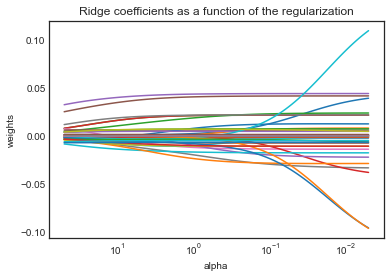

In [155]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

## Change of alpha level

In [156]:
# ridge2= Ridge()
# coefs = []

# for a in alphas:
#     ridge2.set_params(alpha=a)
#     ridge2.fit(X_train, y_train)
#     coefs.append(ridge2.coef_)

In [157]:
# ax = plt.gca()
# ax.plot(alphas, coefs)
# ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
# plt.axis('tight')
# plt.xlabel('alpha')
# plt.ylabel('weights')
# plt.title('Ridge coefficients as a function of the regularization');

In [158]:
ridge2 = Ridge(alpha=len(X_train)*11498/2)
ridge2.fit(X_train, y_train)

Ridge(alpha=64348557.0)

In [159]:
pred2 = ridge2.predict(X_test)
print(mean_squared_error(y_test, pred2))

0.0003850950979643844


## Alpha = $10^{10}$

In [160]:
ridge3 = Ridge()
ridge3.set_params(alpha = 10**10)
ridge3.fit(X_train, y_train)
pred3 = ridge3.predict(X_test)
print(mean_squared_error(y_test, pred3))

0.00038509884137165107


## Ridge Regression with Cross Validation

In [161]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit((X_train), y_train)

RidgeCV(alphas=array([5.00000000e+01, 4.55581378e+01, 4.15108784e+01, 3.78231664e+01,
       3.44630605e+01, 3.14014572e+01, 2.86118383e+01, 2.60700414e+01,
       2.37540508e+01, 2.16438064e+01, 1.97210303e+01, 1.79690683e+01,
       1.63727458e+01, 1.49182362e+01, 1.35929412e+01, 1.23853818e+01,
       1.12850986e+01, 1.02825615e+01, 9.36908711e+00, 8.53676324e+00,
       7.77838072e+00, 7.08737081e+0...
       4.24876718e-02, 3.87131841e-02, 3.52740116e-02, 3.21403656e-02,
       2.92851041e-02, 2.66834962e-02, 2.43130079e-02, 2.21531073e-02,
       2.01850863e-02, 1.83918989e-02, 1.67580133e-02, 1.52692775e-02,
       1.39127970e-02, 1.26768225e-02, 1.15506485e-02, 1.05245207e-02,
       9.58955131e-03, 8.73764200e-03, 7.96141397e-03, 7.25414389e-03,
       6.60970574e-03, 6.02251770e-03, 5.48749383e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [162]:
ridgecv.alpha_

1.4575265314125878

In [163]:
ridge4 = Ridge()
ridge4.set_params(alpha = ridgecv.alpha_)
ridge4.fit(X_train, y_train)
print(mean_squared_error(y_test, ridge4.predict(X_test)))

0.00027064441509669395


In [164]:
pd.Series(ridge4.coef_.flatten(), index=X_train.columns)

host_response_rate                             -0.001875
host_acceptance_rate                            0.000023
host_listings_count                             0.021124
host_total_listings_count                       0.021124
accommodates                                    0.043488
bedrooms                                        0.040423
beds                                           -0.010949
minimum_nights                                 -0.017596
maximum_nights                                  0.000918
minimum_minimum_nights                         -0.010225
maximum_minimum_nights                          0.002135
minimum_maximum_nights                          0.000408
maximum_maximum_nights                          0.017787
minimum_nights_avg_ntm                         -0.000197
maximum_nights_avg_ntm                         -0.007332
availability_30                                 0.006349
availability_60                                -0.000751
availability_90                

# Lasso Regression

We'll use the Lasso() function; however, this time we'll need to include the argument max_iter = 10000. Other than that change, we proceed just as we did in fitting a ridge model

In [165]:
print(alphas*2)

[1.00000000e+02 9.11162756e+01 8.30217568e+01 7.56463328e+01
 6.89261210e+01 6.28029144e+01 5.72236766e+01 5.21400829e+01
 4.75081016e+01 4.32876128e+01 3.94420606e+01 3.59381366e+01
 3.27454916e+01 2.98364724e+01 2.71858824e+01 2.47707636e+01
 2.25701972e+01 2.05651231e+01 1.87381742e+01 1.70735265e+01
 1.55567614e+01 1.41747416e+01 1.29154967e+01 1.17681195e+01
 1.07226722e+01 9.77009957e+00 8.90215085e+00 8.11130831e+00
 7.39072203e+00 6.73415066e+00 6.13590727e+00 5.59081018e+00
 5.09413801e+00 4.64158883e+00 4.22924287e+00 3.85352859e+00
 3.51119173e+00 3.19926714e+00 2.91505306e+00 2.65608778e+00
 2.42012826e+00 2.20513074e+00 2.00923300e+00 1.83073828e+00
 1.66810054e+00 1.51991108e+00 1.38488637e+00 1.26185688e+00
 1.14975700e+00 1.04761575e+00 9.54548457e-01 8.69749003e-01
 7.92482898e-01 7.22080902e-01 6.57933225e-01 5.99484250e-01
 5.46227722e-01 4.97702356e-01 4.53487851e-01 4.13201240e-01
 3.76493581e-01 3.43046929e-01 3.12571585e-01 2.84803587e-01
 2.59502421e-01 2.364489

In [166]:
lasso = Lasso(max_iter=10000) #this dataset is already normalized
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

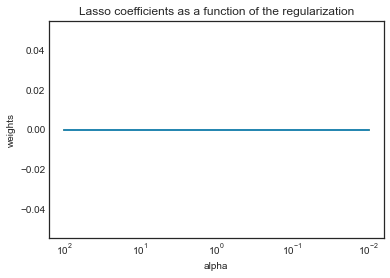

In [167]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

The coefficients are equal to zero

## Cross validation

In [168]:
lassocv = LassoCV(alphas=None, cv = 10, max_iter= 10000)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000)

In [169]:
print(lassocv.alpha_)

4.26988570525581e-06


We have identified the optimal alpha level

In [170]:
lasso.set_params(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)


Lasso(alpha=4.26988570525581e-06, max_iter=10000)

Mean squared error approaching 0

In [171]:
mean_squared_error(y_test, lasso.predict(X_test))

0.0002708955449771957

In [172]:
pd.Series(lasso.coef_, index= X_train.columns)

host_response_rate                             -1.712355e-03
host_acceptance_rate                           -0.000000e+00
host_listings_count                             4.117529e-02
host_total_listings_count                       9.628025e-18
accommodates                                    4.342625e-02
bedrooms                                        4.027747e-02
beds                                           -9.906426e-03
minimum_nights                                 -2.223898e-02
maximum_nights                                  8.457953e-04
minimum_minimum_nights                         -0.000000e+00
maximum_minimum_nights                         -0.000000e+00
minimum_maximum_nights                         -0.000000e+00
maximum_maximum_nights                          1.325432e-02
minimum_nights_avg_ntm                         -0.000000e+00
maximum_nights_avg_ntm                         -0.000000e+00
availability_30                                 6.125332e-03
availability_60         

Attempt at a Sklearn plot

Computing regularization path using the coordinate descent lasso...
Computing regularization path using the Lars lasso...


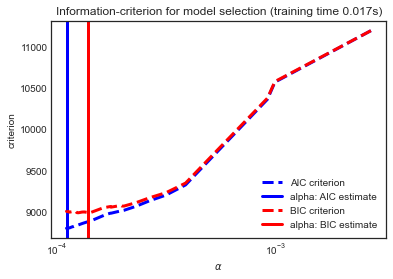

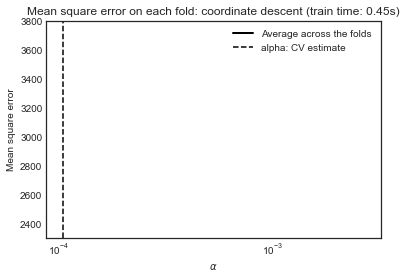

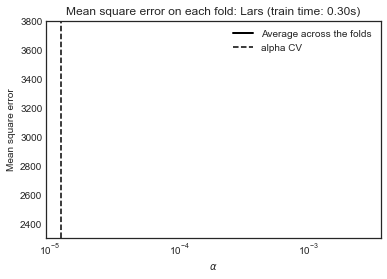

In [173]:
# Author: Olivier Grisel, Gael Varoquaux, Alexandre Gramfort
# License: BSD 3 clause
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4

# X, y = datasets.load_diabetes(return_X_y=True)

# rng = np.random.RandomState(42)
# X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# # normalize data as done by Lars to allow for comparison
# X /= np.sqrt(np.sum(X ** 2, axis=0))

# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion="bic", normalize=False)
t1 = time.time()
model_bic.fit(X_train, y_train)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion="aic", normalize=False)
model_aic.fit(X_train, y_train)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    criterion_ = model.criterion_
    plt.semilogx(
        model.alphas_ + EPSILON,
        criterion_,
        "--",
        color=color,
        linewidth=3,
        label="%s criterion" % name,
    )
    plt.axvline(
        model.alpha_ + EPSILON,
        color=color,
        linewidth=3,
        label="alpha: %s estimate" % name,
    )
    plt.xlabel(r"$\alpha$")
    plt.ylabel("criterion")


plt.figure()
plot_ic_criterion(model_aic, "AIC", "b")
plot_ic_criterion(model_bic, "BIC", "r")
plt.legend()
plt.title("Information-criterion for model selection (training time %.3fs)" % t_bic)

# #############################################################################
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(X_train, y_train)
t_lasso_cv = time.time() - t1

# Display results
plt.figure()
ymin, ymax = 2300, 3800
plt.semilogx(model.alphas_ + EPSILON, model.mse_path_, ":")
plt.plot(
    model.alphas_ + EPSILON,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_ + EPSILON, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()

plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.title(
    "Mean square error on each fold: coordinate descent (train time: %.2fs)"
    % t_lasso_cv
)
plt.axis("tight")
plt.ylim(ymin, ymax)

# #############################################################################
# LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=20, normalize=False).fit(X_train, y_train)
t_lasso_lars_cv = time.time() - t1

# Display results
plt.figure()
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ":")
plt.semilogx(
    model.cv_alphas_ + EPSILON,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(model.alpha_, linestyle="--", color="k", label="alpha CV")
plt.legend()

plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold: Lars (train time: %.2fs)" % t_lasso_lars_cv)
plt.axis("tight")
plt.ylim(ymin, ymax)

plt.show()

# Decision Trees

Decision trees is not possible as the response variable is a continous 

In [174]:
# from sklearn import tree
# clf = tree.DecisionTreeClassifier()
# clf.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

# Random Forests

In [175]:
print(X_train.shape)

(11193, 41)


In [35]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor

In [179]:
# The code below takes approximately 13 seconds to run

## Random forests using all 41 features

In [36]:
regr1 = RandomForestRegressor(max_features=41, random_state=1)
regr1.fit(X_train, y_train)

RandomForestRegressor(max_features=41, random_state=1)

Text(0, 0.5, 'y_test')

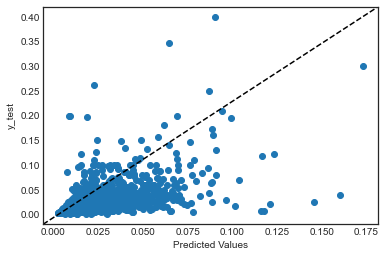

In [181]:
pred = regr1.predict(X_test)
plt.scatter(pred, y_test, label='price')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('Predicted Values')
plt.ylabel('y_test')

In [182]:
mean_squared_error(y_test, pred)

0.0002412218786153619

## Random forests: using 26 features

In [37]:
regr2 = RandomForestRegressor(max_features=26, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(max_features=26, random_state=1)

In [38]:
pred2 = regr2.predict(X_test)
mean_squared_error(y_test, pred2)

0.000225184468666403

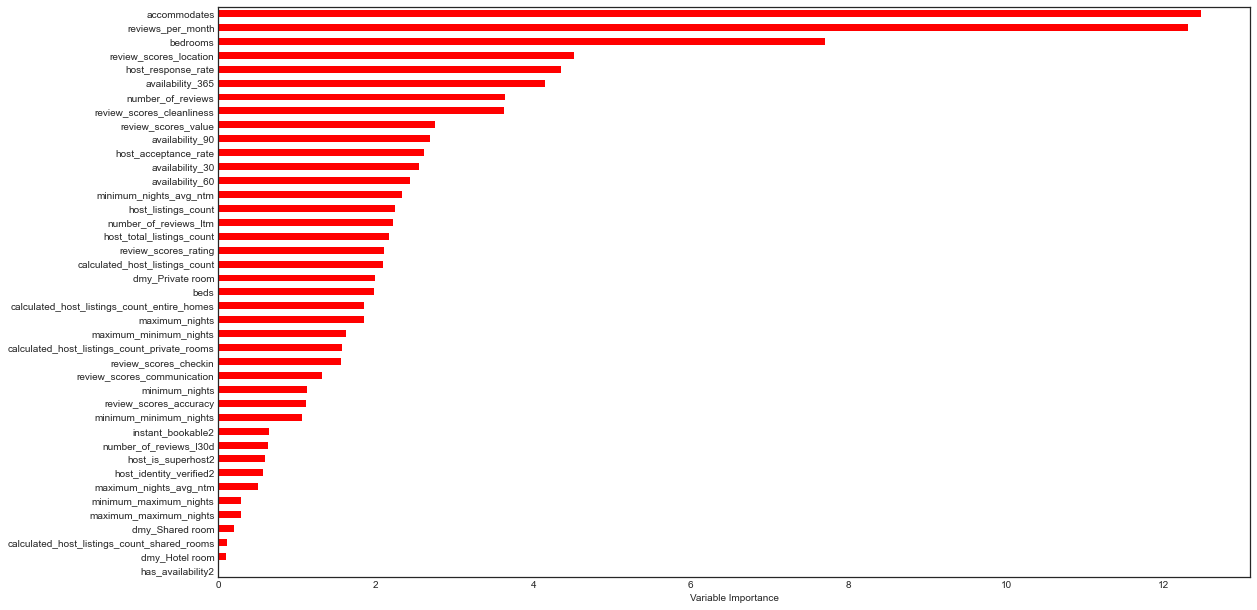

In [64]:
#Importance.plot? helped me solve my issue of increasing the figure size
from matplotlib.pyplot import figure
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X_test.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', figsize =(18.5,10.5))


#get current axes
#plt.gca()
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.gca().autoscaley_on = True

In [62]:
# ?Importance.plot

## Random forests: using 15 features

In [60]:
regr3 = RandomForestRegressor(max_features=15, random_state=1)
regr3.fit(X_train, y_train)
pred = regr3.predict(X_test)
mean_squared_error(y_test, pred)

0.0002227362853143509

In [65]:
# print(regr3.feature_importances_*100)

[3.90333405e+00 2.66405082e+00 2.32223325e+00 2.47134886e+00
 1.03159523e+01 7.64943885e+00 3.04727834e+00 1.21791903e+00
 1.97618415e+00 1.14574135e+00 1.61444352e+00 3.72258477e-01
 5.09763019e-01 1.75032343e+00 3.67135307e-01 3.21695599e+00
 3.09465798e+00 2.69290959e+00 3.62659532e+00 3.24293363e+00
 3.11070523e+00 8.26844059e-01 2.67564263e+00 1.56312967e+00
 2.90175718e+00 2.42454345e+00 1.36470652e+00 4.10757815e+00
 3.24340074e+00 1.80969618e+00 2.53988817e+00 2.30915869e+00
 9.95661305e-02 8.93494696e+00 8.30796334e-01 1.41247288e+00
 1.29716744e-03 3.66645476e-01 1.16278032e-01 2.00674068e+00
 1.52748444e-01]


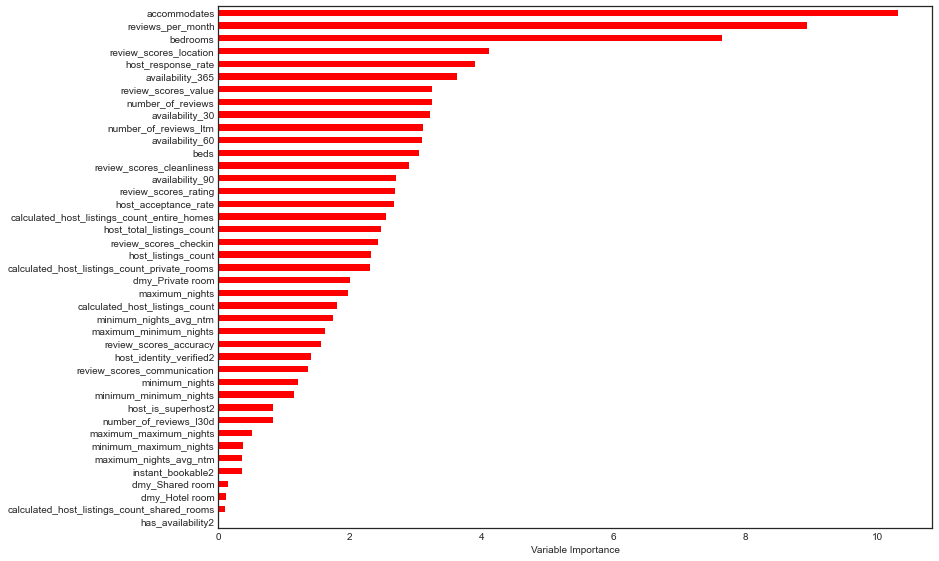

In [61]:
Importance = pd.DataFrame({'Importance':regr3.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r',figsize = (12.8,9.6))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# Boosting

In [66]:
regr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, random_state=1)

host_response_rate                               0.000000
dmy_Hotel room                                   0.000000
instant_bookable2                                0.000000
has_availability2                                0.000000
host_identity_verified2                          0.000000
host_is_superhost2                               0.000000
calculated_host_listings_count_shared_rooms      0.000000
calculated_host_listings_count                   0.000000
review_scores_value                              0.000000
review_scores_communication                      0.000000
review_scores_checkin                            0.000000
review_scores_cleanliness                        0.000000
review_scores_accuracy                           0.000000
number_of_reviews_l30d                           0.000000
number_of_reviews_ltm                            0.000000
host_acceptance_rate                             0.000000
beds                                             0.000000
maximum_nights

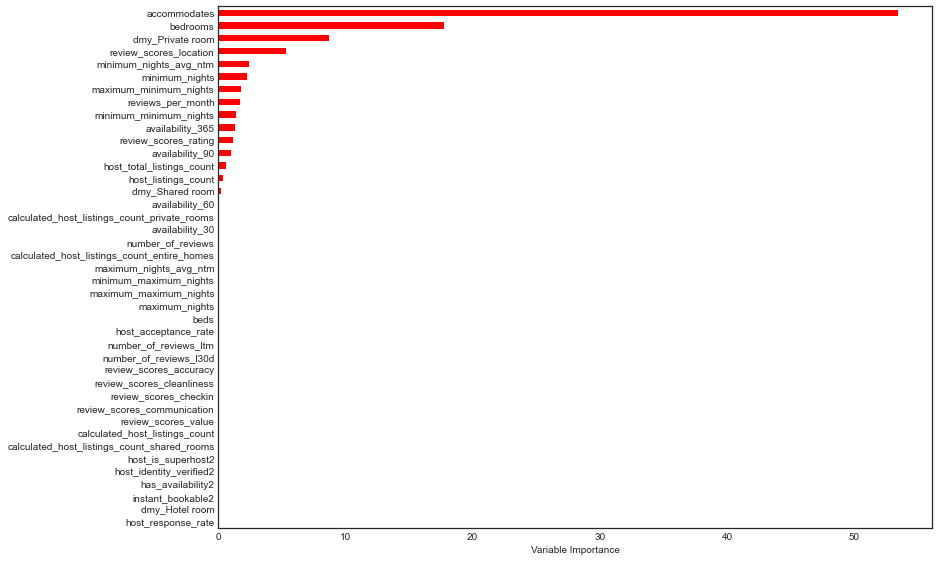

In [67]:
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X_train.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', figsize = (12.8,9.6) )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [206]:
mean_squared_error(y_test, regr.predict(X_test))

0.00029696059682618784

# SVM

SVM does not work on a continous response variable

In [207]:
from sklearn.svm import SVC

In [209]:
# # SVM Classifier model - cost for margin violation is C=10
# svm_clf = SVC(kernel="linear", C=10.0)  #C=float("inf"))
# svm_clf.fit(X_train, y_train)

# # Repeat the fit with smaller "cost" C=0.1 (results in wider margins)
# svm_clf2 = SVC(kernel="linear", C=1)  #C=float("inf"))
# svm_clf2.fit(X_train, y_train)

# KNN

In [210]:
from sklearn.cluster import KMeans

In [211]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_train)

In [213]:
y_pred
print(y_pred is kmeans.labels_)

True


In [214]:
kmeans.cluster_centers_

array([[ 8.69793010e-01,  7.40380186e-01,  1.09274684e-02,
         1.09274684e-02,  2.23532406e-01,  7.33030000e-02,
         5.66301682e-02,  1.71950029e-02,  2.93529187e-01,
         1.73184981e-02,  2.32594926e-02,  1.44791090e-06,
         3.40726040e-06,  2.26253071e-02,  2.12193610e-06,
         1.07284244e-01,  1.89051012e-01,  3.11145044e-01,
         4.42805546e-01,  2.77892234e-02,  1.00857674e-02,
         1.02634465e-02,  9.32602189e-01,  9.36489742e-01,
         9.07973698e-01,  9.55869382e-01,  9.48332136e-01,
         9.47192433e-01,  9.03207157e-01,  4.07350369e-02,
         5.26237655e-02,  2.26287513e-03,  5.87037665e-03,
         1.17525209e-02,  2.77555756e-16,  8.69697998e-01,
         9.98982016e-01,  1.68306753e-01,  6.44723448e-03,
        -1.72084569e-15,  1.96810316e-02],
       [ 7.90596234e-01,  6.77103846e-01,  3.11724812e-03,
         3.11724812e-03,  1.84459990e-01,  4.52290105e-02,
         4.35879574e-02,  1.54301791e-02,  2.82955024e-01,
         1.52

## Decision Boundaries
Ask Professor Slavov for help!
Let's plot the model's decision boundaries. This gives us a Voronoi diagram

In [237]:
# def plot_data(X):
#     plt.plot(X_train.iloc[:, 0], X_train.iloc[:, 1], 'k.', markersize=2)

# def plot_centroids(centroids, weights=None, circle_color='w', cross_color='b'):
#     if weights is not None:
#         centroids = centroids[weights > weights.max() / 10]
#     plt.scatter(centroids[:, 0], centroids[:, 1],
#                 marker='o', s=30, linewidths=8,
#                 color=circle_color, zorder=10, alpha=0.9)
#     plt.scatter(centroids[:, 0], centroids[:, 1],
#                 marker='x', s=10, linewidths=11,
#                 color=cross_color, zorder=11, alpha=1)

# def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
#                              show_xlabels=True, show_ylabels=True):
#     mins = X_train.min(axis=0) - 0.1
#     maxs = X_train.max(axis=0) + 0.1
#     xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
#                          np.linspace(mins[1], maxs[1], resolution))
#     Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
#                 cmap="Pastel2")
#     plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
#                 linewidths=1, colors='k')
#     plot_data(X_train)
#     if show_centroids:
#         plot_centroids(clusterer.cluster_centers_)

#     if show_xlabels:
#         plt.xlabel("$x_1$", fontsize=14)
#     else:
#         plt.tick_params(labelbottom=False)
#     if show_ylabels:
#         plt.ylabel("$x_2$", fontsize=14, rotation=0)
#     else:
#         plt.tick_params(labelleft=False)

In [220]:
# plt.figure(figsize=(8, 4))
# plot_decision_boundaries(kmeans, X_train)
# save_fig("voronoi_plot")
# plt.show()

ValueError: X has 2 features, but KMeans is expecting 41 features as input.

<Figure size 576x288 with 0 Axes>

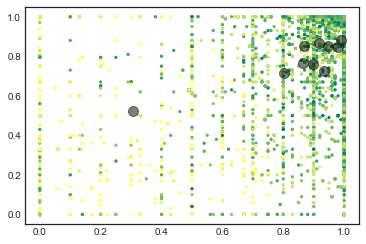

In [233]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=10, init='random', n_init=1, random_state=0, max_iter=1) 
kmeans.fit(X_train) 
y_kmeans = kmeans.predict(X_train) 
# cluster index for each observation 
centers = kmeans.cluster_centers_ 
# cluster center coordinates 
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_kmeans, s=5, cmap='summer') 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

## K-Means algorithm

In [234]:
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=1, random_state=1)
# kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=2, random_state=1)
# kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=3, random_state=1)
# kmeans_iter1.fit(X_train)
# kmeans_iter2.fit(X_train)
# kmeans_iter3.fit(X_train)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

ValueError: X has 2 features, but KMeans is expecting 41 features as input.

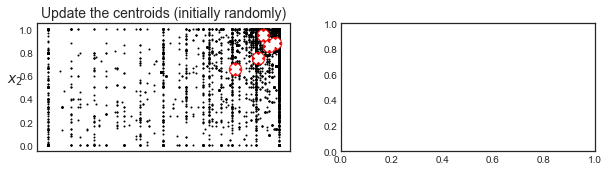

In [238]:
# plt.figure(figsize=(10, 8))

# plt.subplot(321)
# plot_data(X_train)
# plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
# plt.ylabel("$x_2$", fontsize=14, rotation=0)
# plt.tick_params(labelbottom=False)
# plt.title("Update the centroids (initially randomly)", fontsize=14)

# plt.subplot(322)
# plot_decision_boundaries(kmeans_iter1, X_train, show_xlabels=False, show_ylabels=False)
# plt.title("Label the instances", fontsize=14)

# plt.subplot(323)
# plot_decision_boundaries(kmeans_iter1, X_train, show_centroids=False, show_xlabels=False)
# plot_centroids(kmeans_iter2.cluster_centers_)

# plt.subplot(324)
# plot_decision_boundaries(kmeans_iter2, X_train, show_xlabels=False, show_ylabels=False)

# plt.subplot(325)
# plot_decision_boundaries(kmeans_iter2, X_train, show_centroids=False)
# plot_centroids(kmeans_iter3.cluster_centers_)

# plt.subplot(326)
# plot_decision_boundaries(kmeans_iter3, X_train, show_ylabels=False)

# save_fig("kmeans_algorithm_plot")
# plt.show()

In [72]:
print(X_train.columns.get_loc("accommodates"))
print(X_train.columns.get_loc("bedrooms"))

4
5


In [73]:
print(X_train["accommodates"].min())

0.0
